# EDA - Preprocesamiento

## Introducción

El conjunto de datos `water_portability.csv` contiene métricas de calidad del agua que indican la potabilidad de cada muestra. Ofrece una visión general completa de la composición química y las propiedades físicas del agua, factores para determinar su aptitud para el consumo humano.

Por lo tanto, el problema a resolver se basa en clasificar si el agua es potable o no, dadas las características que representan varios parámetros de calidad del agua.

El dataset fue rescatado de [Kaggle](https://www.kaggle.com/datasets/anairamcosta/water-potability-csv?utm_source=chatgpt.com). 

Importamos las librerías necesarias.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PowerTransformer
from sklearn.compose import ColumnTransformer

A continuación, se muestra el conjunto de datos a utilizar: `water_portability.csv`.

In [2]:
data = pd.read_csv('water_potability.csv')
data

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


Con `.info()` visualizamos la descripción general del conjunto de datos, donde podemos observar la cantidad de datos no nulos por columna y el tipo de datos de cada uno.

In [3]:
data.info()

<class 'pandas.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


Aquí se describen estadísticas para todas las columnas númericas, en el caso de este dataset corresponden a todas las columnas.

In [4]:
data.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


En total se tienen 10 columnas: 

* pH: pH de agua (0-14)
* Hardness: Medida de minerales en el agua.
* Solids: Total de sólidos disueltos en ppm.
* Chloramines: Cantidad de cloraminas en ppm.
* Sulfate: Cantidad de sulfatos disueltos en el agua en ppm. 
* Conductivity: Conductividad eléctrica del agua en μS/cm.
* Organic carbon: Cantidad de carbono orgánico en ppm.
* Trihalomethanes: Cantidad de trihalometanos en μg/L.
* Turbidity: Medida de las propiedades de dispersión de la luz1 del agua en NTU.
* Potability: Indica si el agua es potable (1) o no (0).

Por el contexto del problema, es necesario mantener todas las características mencionadas anteriormente ya que representan parámetros esenciales para determinar la potabilidad del agua.

## Visualización de Características Númericas

Ahora, se muestra la distribución de las características. La columna de potabilidad fue excluida de este análisis, ya que será contemplada para la distribución de la etiqueta objetivo. 

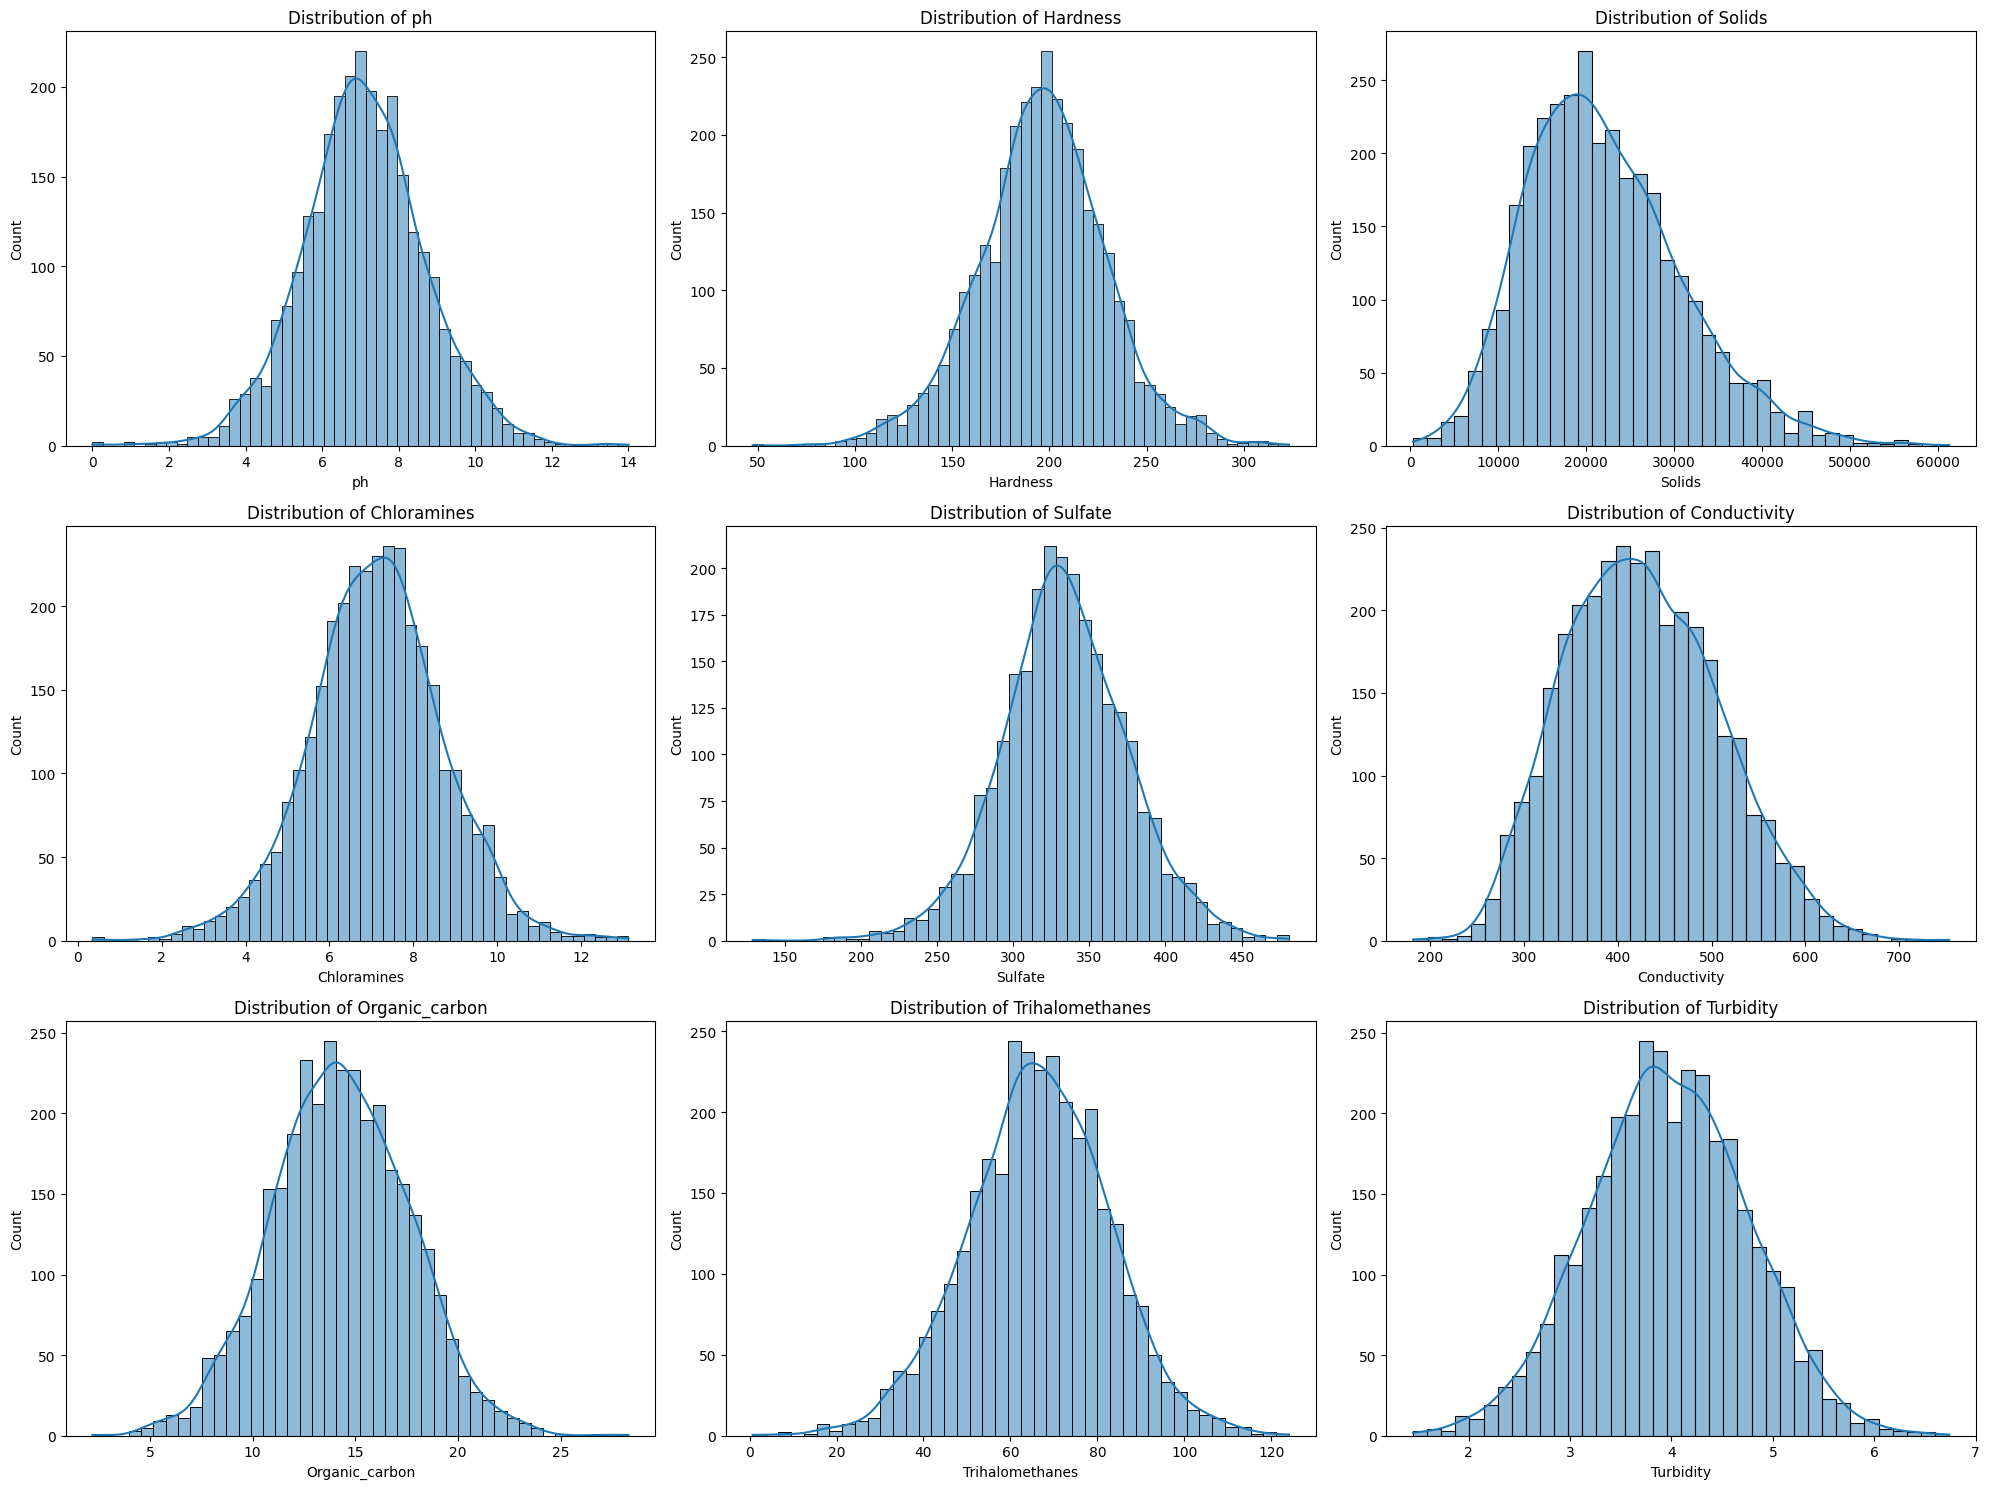

In [5]:
numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns
numerical_cols = numerical_cols.drop('Potability')

fig, axs = plt.subplots(3, 3, figsize=(20, 15))

for ax, col in zip(axs.ravel(), numerical_cols):
    sns.histplot(data[col], ax=ax, kde=True)
    ax.set_title(f'Distribution of {col}')

fig.tight_layout()

Observando los histogramas podemos identificar diferentes patrones en las distribuciones. En primer lugar, las características muestran una distribución normal (forma de campana), con una consistencia en sus valores, donde: 

* pH: La mayoria de valores están entre 6 y 8, centrado alrededor de 7.
* Hardness: Distribución centrada en 200.
* Chloramines: Valores concentrados alrededor de 7.
* Organic_carbon: Distribución centrada en 14.
* Turbidity: La mayoría de valores alrededor de 4.

Por otro lado, se pueden visualizar algunas características con rangos demasiado amplios, donde: 
* Solids: Valores desde 5000 hasta 60000.
* Sulfate: Mayoría entre 100-450, pero con algunos valores más altos.
* Conductivity: Rango amplio entre 200-700.
* Trihalomethanes: Valores entre 0-120 con basta disperción.

Lo que sugiere que las columnas tienen rangos completamente diferentes. Por ejemplo, `Solids` puede llegar a 60000 mientras que `pH` solo va de 0 a 14. Estos valores deben ser normalizados, ya que las caracteristicas con valores más grandes podrían tener mucho más peso en el modelo, aunque no sean necesarimente más importantes para determinar si el agua es potable.

## Visualización de Características Categóricas

En este dataset no es posible realizar visualizaciones de características categóricas porque todas las columnas son de naturaleza numérica. Cada columna representa una medición química o física del agua, que por su naturaleza son valores numéricos medibles.

La única variable binaria en el dataset es `Potability` (0 = no potable, 1 = potable), pero esta es nuestra variable objetivo y será analizada en la siguiente sección.

Por lo tanto, las técnicas de visualización categórica no son aplicables en este caso, y el análisis se centra completamente en las características numéricas.

## Distribución de la Etiqueta Objetivo

Por último, observamos la distribución de la etiqueta objetivo `Potability`, para entender el balance en el conjunto de datos.

Text(0.5, 0, 'Potability')

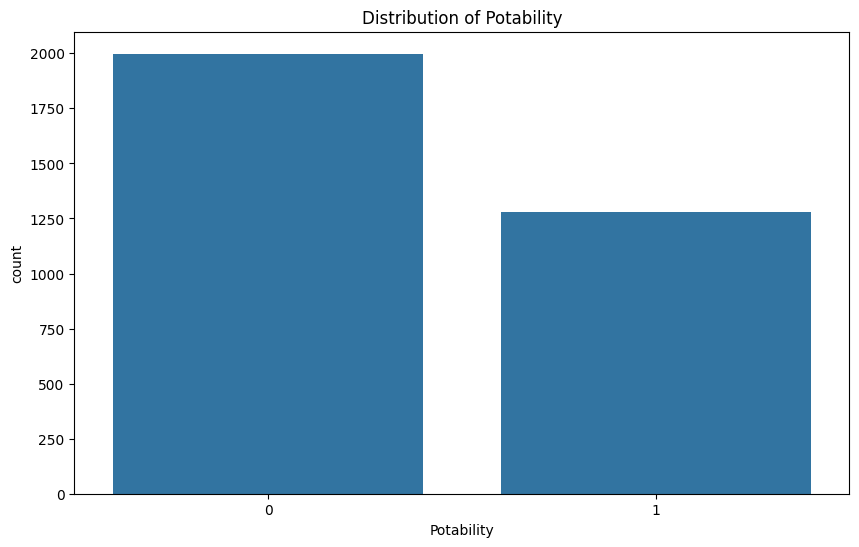

In [6]:
fig = plt.figure(figsize=(10, 6))
sns.countplot(x='Potability', data=data)
plt.title('Distribution of Potability')
plt.xlabel('Potability')

El dataset presenta un desbalance moderado de clases. Por consecuencia, este desbalanceo porovoca incertidumbre en las predicciones, ya que el modelo podría tender a predecir más la clase mayoritaria. Más adelante se podrán apreciar los resultados sin aplicar técnicas adicionales para el modelo. 

Comparamos el agua potables con relación a la demás características. 

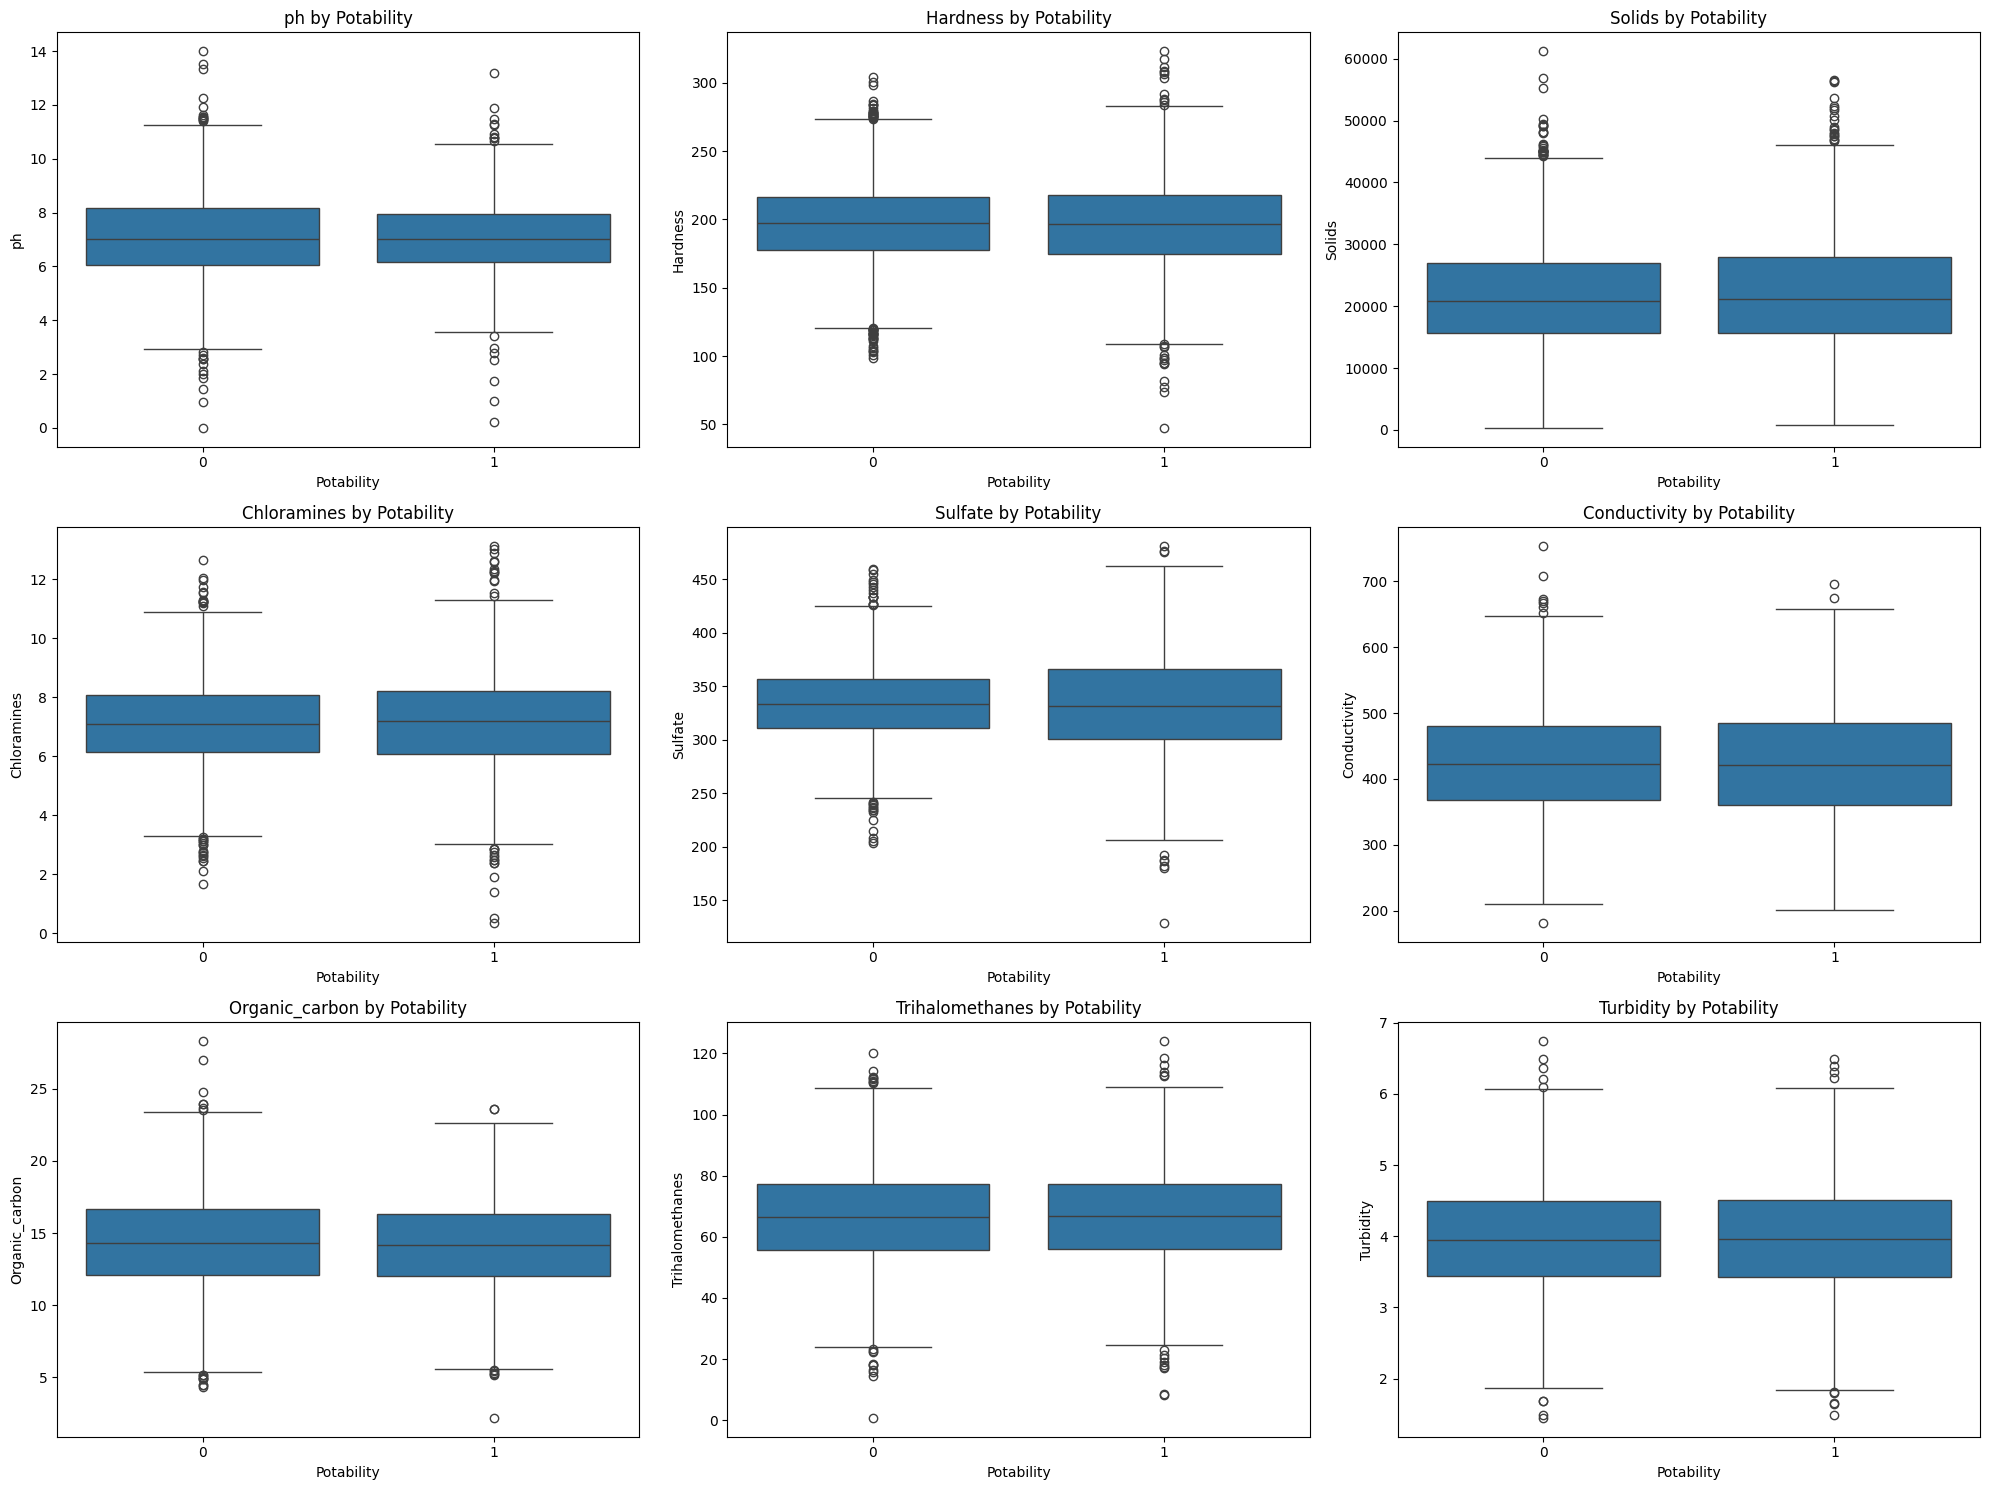

In [7]:
fig, axs = plt.subplots(3, 3, figsize=(20, 15))

for ax, col in zip(axs.ravel(), numerical_cols):
    sns.boxplot(x='Potability', y=col, data=data, ax=ax)
    ax.set_title(f'{col} by Potability')

fig.tight_layout()

Los boxplots muestran que las distribuciones de cada característica son muy similares entre agua potable (1) y no potable (0). Las cajas se traslapan casi completamente en todas las características y las líneas del medio están prácticamente en el mismo lugar para ambas clases. Esto quiere decir que el agua potable no se diferencia por tener más o menos de un químico específico, sino que probablemente depende de combinaciones complejas de varias características a la vez. Básicamente, ninguna característica por sí sola tiene más importancia para determinar si el agua es potable o no.

A continuación, se presenta la matriz de correlación.

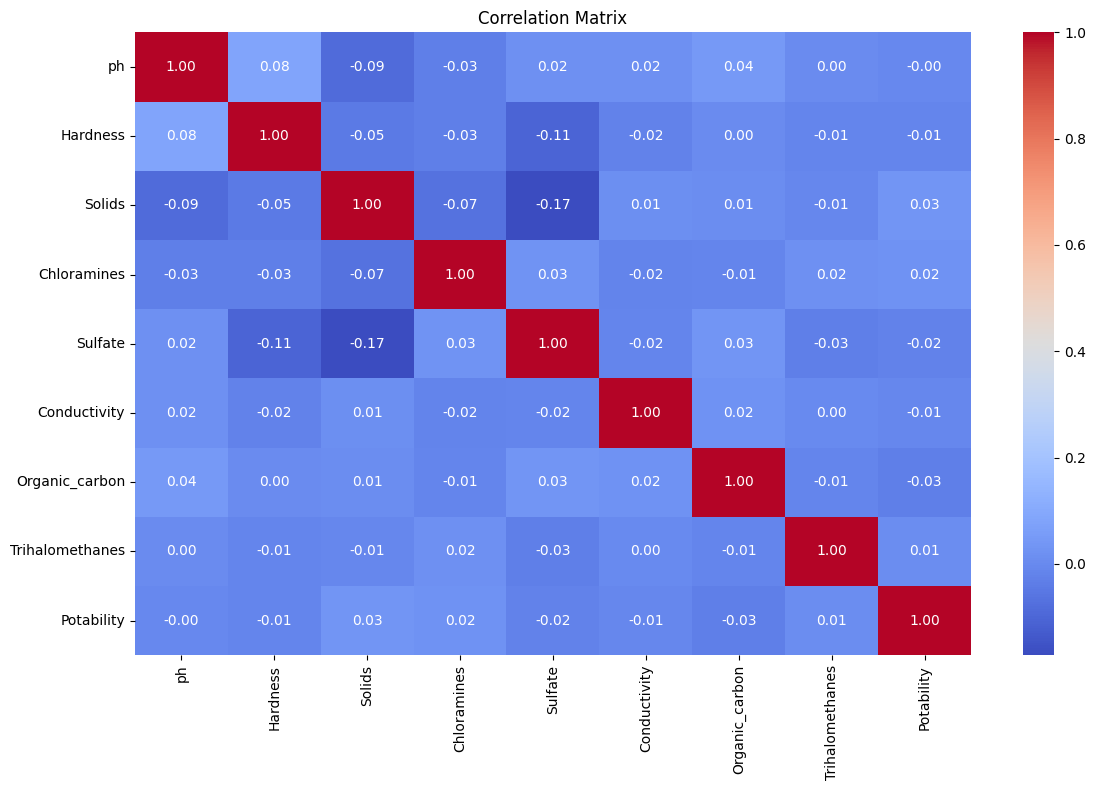

In [8]:
corr_matrix = data[['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Potability']].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.tight_layout()

Nuevamente, la matriz de correlación confirma matemáticamente lo que observamos en los boxplots. Los números más importantes a notar son los de la última fila que corresponden a `Potability`, debido a que todas las características tienen correlaciones extremadamente bajas con la potabilidad.

Entonces, ninguna característica química por sí sola predice la potabilidad y, además, las características son independientes entre sí.

## Manejo de Valores Faltantes

Podemos visualizar los valores faltantes por cada columna.

<Axes: >

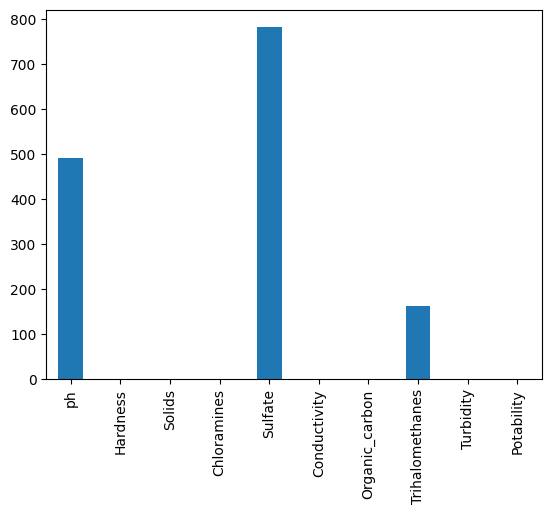

In [9]:
missing_values = data.isnull().sum()
missing_values.plot(kind='bar')

También, el porcentaje de valores faltantes por cada columna.

In [10]:
missing_percent = data.isnull().mean() * 100
missing_percent.sort_values(ascending=False)

Sulfate            23.840049
ph                 14.987790
Trihalomethanes     4.945055
Hardness            0.000000
Chloramines         0.000000
Solids              0.000000
Conductivity        0.000000
Organic_carbon      0.000000
Turbidity           0.000000
Potability          0.000000
dtype: float64

Con base en los porcentajes de valores faltantes, se implementarán las siguientes estrategias:

* `Sulfate`: Se usará la media, porque tiene un porcentaje considerable de datos faltantes. Además, su distribución es aproximadamente normal según su histograma. Por lo tanto, la media es un buen representante para ocupar los valores faltantes.
* `pH`: También se usará la media, ya que aproximadamente el 15% de los datos están faltantes y se tiene una distribución normal.
* `Trihalomethanes`: Aquí se utilizará el valor más frecuente, porque con tan pocos valores faltantes usar la moda tienen menor impacto en la distribución original. Entonces, no se alterarán significativamente los datos.

## Pipeline de preprocesamiento

Ahora se construirá el pipeline de preprocesamiento usando `ColumnTransformer`.

Primero, se separaron las columnas de la siguiente manera:

* `cols_with_missing_mean`: Columnas con valores faltantes que se rellenarán con la media (`ph`, `Sulfate`)
* `cols_with_missing_mode`: Columnas con valores faltantes que se rellenarán con la moda (`Trihalomethanes`)
* `cols_without_missing`: Columnas completas que solo necesitan normalización (`Hardness`, `Solids`, `Chloramines`, `Conductivity`, `Organic_carbon`, `Turbidity`)

El `ColumnTransformer` aplica tres transformaciones diferentes:

1. `mean_scale`: Para `ph` y `Sulfate` primero ejecuta `SimpleImputer(strategy='mean')`, rellenando valores faltantes con la media, y luego ejecuta `StandardScaler()` normalizando los datos.
   
2. `mode_scale`: Para `Trihalomethanes` primero ejecuta `SimpleImputer(strategy='most_frequent')`, el cual rellena con el valor más frecuente y posteriormente ejecuta `StandardScaler()` para normalizar los datos.

3. `scale`: Para las columnas sin valores faltantes solo se ejecuta `StandardScaler()` para normalizar los datos directamente.


In [11]:
cols_with_missing_mean = ['ph', 'Sulfate']
cols_with_missing_mode = ['Trihalomethanes']  

cols_without_missing = ['Hardness', 'Solids', 'Chloramines', 'Conductivity', 'Organic_carbon', 'Turbidity']

preprocessing_pipeline = ColumnTransformer(
    transformers=[
        ('mean_scale', make_pipeline( SimpleImputer(strategy='mean'), StandardScaler()), cols_with_missing_mean),
        ('mode_scale', make_pipeline( SimpleImputer(strategy='most_frequent'), StandardScaler()), cols_with_missing_mode),
        ('scale',  StandardScaler(), cols_without_missing)
    ]
)

Ahora, se definen los features `x` y label `y`, seguido de la división del dataset en conjunto de entrenamiento y prueba.

In [12]:
x = data.drop('Potability', axis=1)
y = data['Potability']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

Se puede verificar la distribución de clases tanto en el conjunto de entrenamiento como en el de prueba.

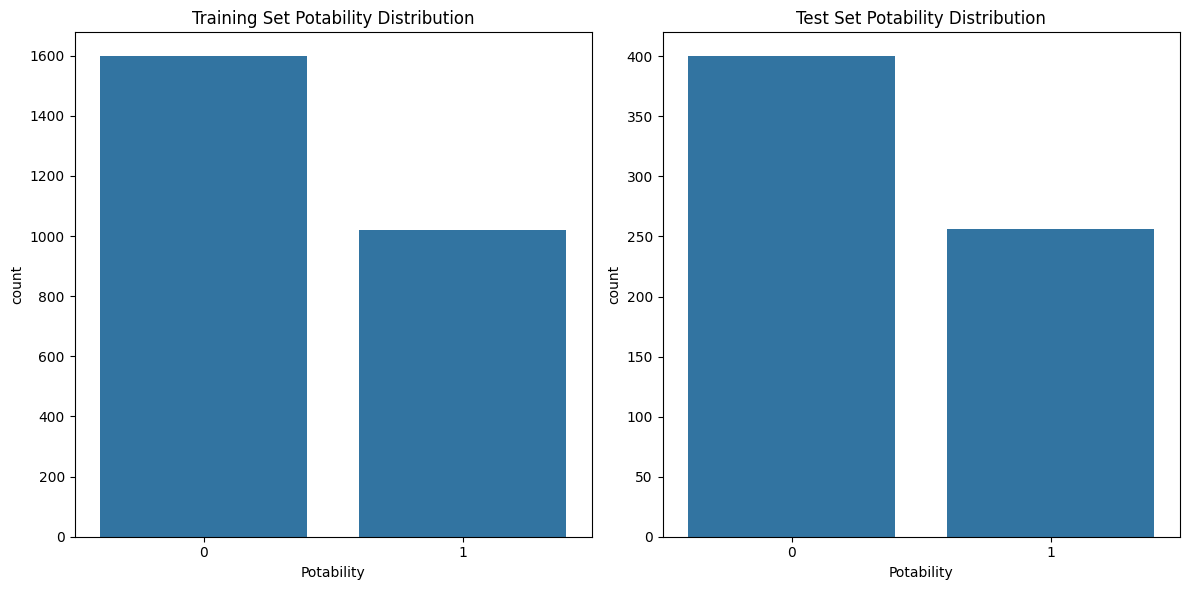

In [13]:
fig, axs = plt.subplots(1 , 2, figsize=(12, 6))
sns.countplot(x=y_train, ax=axs[0])
axs[0].set_title('Training Set Potability Distribution')
sns.countplot(x=y_test, ax=axs[1])
axs[1].set_title('Test Set Potability Distribution')
plt.tight_layout()

Aplicamos el pipline de preprocesamiento al conjunto de entrenamiento, para que se apliquen las transformaciones previamente descritas y para que aprenda los parámetros necesarios.

In [14]:
x_train_processed = preprocessing_pipeline.fit_transform(x_train, y_train)
x_train_processed

array([[ 0.5000303 ,  2.04640627, -0.11243817, ...,  0.92518305,
         0.56524237, -0.17745664],
       [-0.71478897,  1.61185004, -1.01075641, ..., -1.5016933 ,
        -2.16944822, -0.48650158],
       [ 0.92382532,  0.        , -0.10222873, ..., -0.8181372 ,
         0.08540402,  0.5472018 ],
       ...,
       [ 0.05189527, -0.37896749,  1.28111716, ..., -0.15246003,
         0.59112626, -0.79398318],
       [-0.30086058,  0.        ,  0.75329535, ...,  1.05586098,
         1.81798425,  0.25234143],
       [-0.3196753 ,  2.72084911,  0.48623589, ..., -0.32431231,
        -0.76051077,  0.59461298]], shape=(2620, 9))

In [15]:
x_test_processed = preprocessing_pipeline.transform(x_test)
x_test_processed

array([[ 6.04446926e-16,  0.00000000e+00,  7.34515014e-01, ...,
        -4.92410791e-01,  2.65883798e-01, -1.60233630e+00],
       [-6.22854472e-01, -3.16524843e-01,  2.51018330e-01, ...,
         4.84064841e-01,  2.11207446e+00,  2.00209779e-01],
       [ 6.04446926e-16,  6.74686333e-01,  1.28301807e+00, ...,
        -1.13401350e+00,  5.31646024e-02,  5.59978145e-01],
       ...,
       [ 1.37704964e-01,  6.57139094e-01,  4.21443820e-02, ...,
        -3.09422497e-01, -1.91516881e+00,  9.31609690e-01],
       [ 6.04446926e-16,  4.14926864e-01,  1.21505411e+00, ...,
        -7.47896588e-01, -1.01569821e-01,  7.50524201e-01],
       [ 4.44738039e-01,  8.28244536e-01,  5.11082505e-01, ...,
         1.15040527e+00,  3.14902820e-01, -2.98181590e-01]],
      shape=(656, 9))

Ahora creamos el modelo de clasificación, que combina el pipeline de preprocesamiento con el modelo de regresión logística. De esta manera se aplicarán todas las transformaciones de preprocesamiento antes de pasar los datos al modelo. 

In [16]:
classification_model = make_pipeline(
    preprocessing_pipeline,
    LogisticRegression()
)   

classification_model

,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('columntransformer', ...), ('logisticregression', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"transformers transformers: list of tuplesList of (name, transformer, columns) tuples specifying thetransformer objects to be applied to subsets of the data.name : str Like in Pipeline and FeatureUnion, this allows the transformer and its parameters to be set using ``set_params`` and searched in grid search.transformer : {'drop', 'passthrough'} or estimator Estimator must support :term:`fit` and :term:`transform`. Special-cased strings 'drop' and 'passthrough' are accepted as well, to indicate to drop the columns or to pass them through untransformed, respectively.columns : str, array-like of str, int, array-like of int, array-like of bool, slice or callable Indexes the data on its second axis. Integers are interpreted as positional columns, while strings can reference DataFrame columns by name. A scalar string or int should be used where ``transformer`` expects X to be a 1d array-like (vector), otherwise a 2d array will be passed to the transformer. A callable is passed the input data `X` and can return any of the above. To select multiple columns by name or dtype, you can use :obj:`make_column_selector`.","[('mean_scale', ...), ('mode_scale', ...), ...]"
,"remainder remainder: {'drop', 'passthrough'} or estimator, default='drop'By default, only the specified columns in `transformers` aretransformed and combined in the output, and the non-specifiedcolumns are dropped. (default of ``'drop'``).By specifying ``remainder='passthrough'``, all remaining columns thatwere not specified in `transformers`, but present in the data passedto `fit` will be automatically passed through. This subset of columnsis concatenated with the output of the transformers. For dataframes,extra columns not seen during `fit` will be excluded from the outputof `transform`.By setting ``remainder`` to be an estimator, the remainingnon-specified columns will use the ``remainder`` estimator. Theestimator must support :term:`fit` and :term:`transform`.Note that using this feature requires that the DataFrame columnsinput at :term:`fit` and :term:`transform` have identical order.",'drop'
,"sparse_threshold sparse_threshold: float, default=0.3If the ou

Entrenamos el modelo con los datos `x_train` y `y_train`.

In [17]:
classification_model.fit(x_train, y_train)

,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('columntransformer', ...), ('logisticregression', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"transformers transformers: list of tuplesList of (name, transformer, columns) tuples specifying thetransformer objects to be applied to subsets of the data.name : str Like in Pipeline and FeatureUnion, this allows the transformer and its parameters to be set using ``set_params`` and searched in grid search.transformer : {'drop', 'passthrough'} or estimator Estimator must support :term:`fit` and :term:`transform`. Special-cased strings 'drop' and 'passthrough' are accepted as well, to indicate to drop the columns or to pass them through untransformed, respectively.columns : str, array-like of str, int, array-like of int, array-like of bool, slice or callable Indexes the data on its second axis. Integers are interpreted as positional columns, while strings can reference DataFrame columns by name. A scalar string or int should be used where ``transformer`` expects X to be a 1d array-like (vector), otherwise a 2d array will be passed to the transformer. A callable is passed the input data `X` and can return any of the above. To select multiple columns by name or dtype, you can use :obj:`make_column_selector`.","[('mean_scale', ...), ('mode_scale', ...), ...]"
,"remainder remainder: {'drop', 'passthrough'} or estimator, default='drop'By default, only the specified columns in `transformers` aretransformed and combined in the output, and the non-specifiedcolumns are dropped. (default of ``'drop'``).By specifying ``remainder='passthrough'``, all remaining columns thatwere not specified in `transformers`, but present in the data passedto `fit` will be automatically passed through. This subset of columnsis concatenated with the output of the transformers. For dataframes,extra columns not seen during `fit` will be excluded from the outputof `transform`.By setting ``remainder`` to be an estimator, the remainingnon-specified columns will use the ``remainder`` estimator. Theestimator must support :term:`fit` and :term:`transform`.Note that using this feature requires that the DataFrame columnsinput at :term:`fit` and :term:`transform` have identical order.",'drop'
,"sparse_threshold sparse_threshold: float, default=0.3If the ou

Ahora usamos el modelo entrenado para predecir la potabilidad del agua en el conjunto de prueba. 

In [18]:
y_test_pred = classification_model.predict(x_test)
y_test_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

El resultado muestra que el modelo predijo 0 (agua no potable) para todas las muestras del conjunto de prueba. Este comportamiento se debe al desbalance de clases mencionado anteriormente. El modelo aprendió que la clase mayoritaria es más frecuente y, sin técnicas adicionales para balancear, simplemente predice siempre la clase más común.

Por ahora, los resultados demuestran la importancia del preprocesamiento correcto y no se enfocan demasiado en la mejora del modelo para obtener mejores resultados.

Finalmente, agregamos las predicciones al DataFrame de prueba, esto nos permite visualizar los datos originales y lo que el modelo predijo facilitando el análisis de los resultados.

In [19]:
x_test['Potability_Predicted'] = y_test_pred
x_test['Potability_Actual'] = y_test.values
x_test

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability_Predicted,Potability_Actual
664,NaN,188.743562,19037.462638,6.034236,NaN,388.065857,15.149068,78.499418,2.723651,0,1
2530,6.172517,187.787017,10498.635154,7.722561,322.521035,467.090425,21.233978,68.163642,4.129985,0,0
2870,NaN,176.386651,26003.163265,7.809251,358.429774,336.142005,14.447961,90.224844,4.410674,0,0
1045,6.369112,235.340943,34456.801132,9.170940,295.350524,357.417285,9.213268,59.280269,2.275903,0,0
95,6.140878,197.876090,26687.874483,7.587196,329.231853,548.072761,15.836330,41.263648,5.359460,0,0
...,...,...,...,...,...,...,...,...,...,...,...
322,7.798454,188.394942,32704.569286,11.078872,258.191184,507.178688,18.272439,85.177662,4.107267,0,1
2042,7.669013,205.595635,11579.441693,4.263279,356.136518,407.721613,10.829045,83.243808,4.589513,0,1
1696,7.290089,205.213105,26115.616326,5.137891,357.794088,402.874799,7.960478,63.698514,4.700618,0,0
1259,NaN,164.094744,9344.653322,5.959309,349.019434,367.389811,13.937968,88.771969,4.559337,0,0
